In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import scipy as scp;
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation

In [2]:
data = np.loadtxt("../Recom0/test_with_tof2.txt", delimiter=',', dtype=np.complex64);
time = data[:,2].astype(np.float64);
dt = time[2]-time[1];
data_subtracted=data[:, 4:]
np.shape(data_subtracted)

/tmp/ipykernel_38442/2994653388.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  time = data[:,2].astype(np.float64);


(43540, 1793)

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_38442/2441421813.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/tmp/ipykernel_38442/2441421813.py:5: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel("$p(\hbar k_L)$")


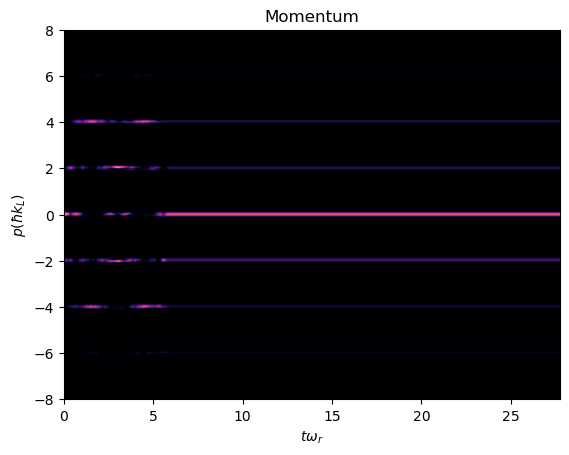

In [7]:
plt.imshow(np.square(np.abs(data_subtracted)).T, cmap = "magma", extent = [ time[0],time[-1], -16/2,16/2 ,],origin="lower",aspect = "auto")
plt.grid(False)
plt.title("Momentum")
plt.xlabel("$t\omega_r$")
plt.ylabel("$p(\hbar k_L)$")
y = np.arange(-8,9)
#plt.plot(np.ones(len(y))*32*np.pi/11.5, y)

## FFT STYLE 1

In [ ]:
# myfft = np.array([scp.fft.fft( data_subtracted[n,:]) for n in range(len(data_subtracted))])
# x_val=np.square(np.abs(myfft))
# plt.imshow(x_val.T, cmap="magma", aspect="auto")
# halfway = int((len(x_val[:,0])-1)/2)
# halfway
# x_reshaped = np.concatenate( (x_val[:,halfway:], x_val[:,0:halfway+1]), axis=1 )
# plt.imshow(x_val[:, halfway:-1], cmap="magma", aspect="auto")
# plt.imshow(x_val[:,0:halfway+1], aspect = "auto")

## FFT STYLE 2

In [7]:
# halfway = int((len(data_subtracted[0,:])-1)/2)
# halfway
# p_reshaped = np.concatenate( (data_subtracted[:,halfway:], data_subtracted[:,0:halfway+1]), axis=1 )
# myfft = np.array([scp.fft.fft(p_reshaped[n]) for n in range(len(data_subtracted))])
# myfft_reshaped=np.concatenate( (myfft[:,halfway:], myfft[:,0:halfway+1]), axis=1 )
# temp = np.square(np.abs(myfft_reshaped));
# myfft_reshaped_rescaled = np.array ( [ temp[m,:]/np.sum(temp[m,:])    for m in range(len(myfft_reshaped)) ] )

/home/temp/Github_Projects/lattice_evolution/Python/p2x_fft.py:19: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t\omega_r$")
/home/temp/Github_Projects/lattice_evolution/Python/p2x_fft.py:30: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi(t) = A\sin\omega t$")
/home/temp/Github_Projects/lattice_evolution/Python/p2x_fft.py:31: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$t(\omega_R^{-1})$")
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:2855: ComplexWarning: Casting complex values to real discards the imag

Time when TOF starts:	8.741823036075946


/home/temp/.conda/envs/Research_Lattice/lib/python3.12/site-packages/matplotlib/transforms.py:766: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


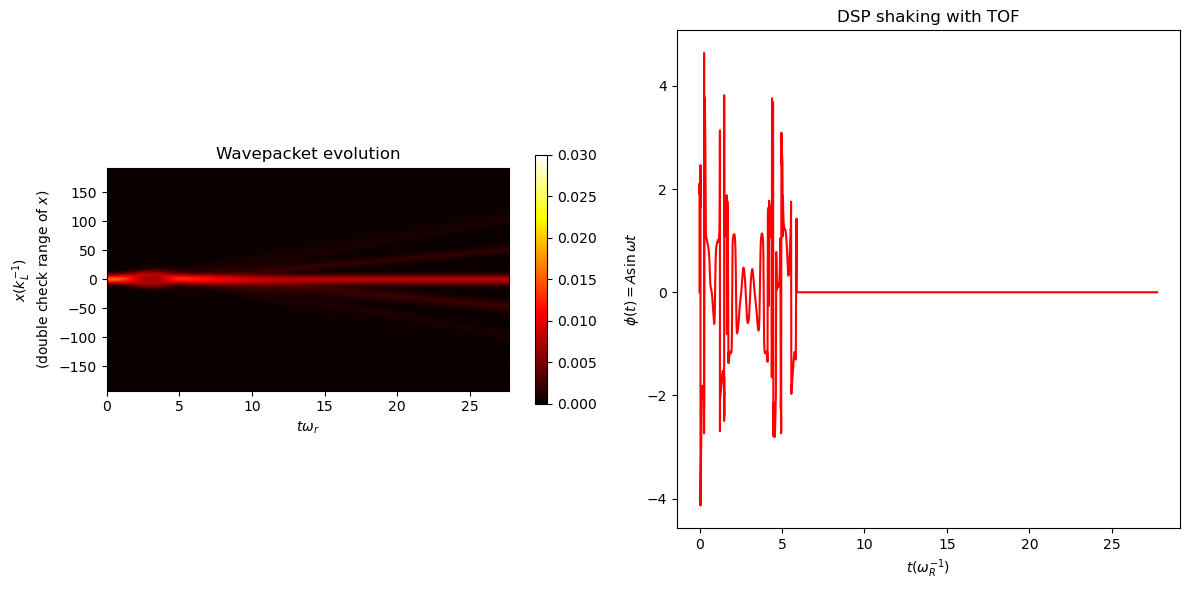

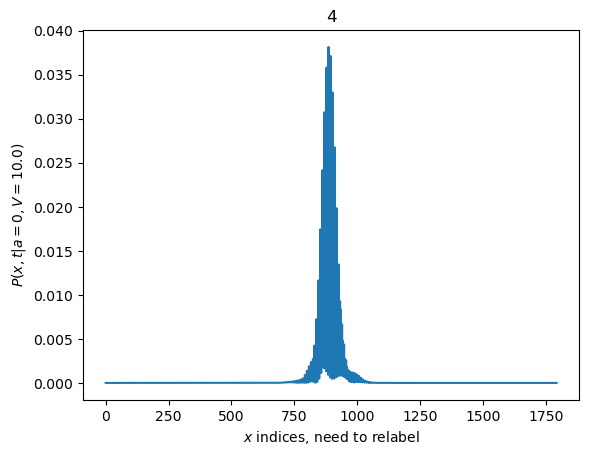

In [6]:
%run -i "p2x_fft.py"

Time when TOF starts:	8.741823036075946


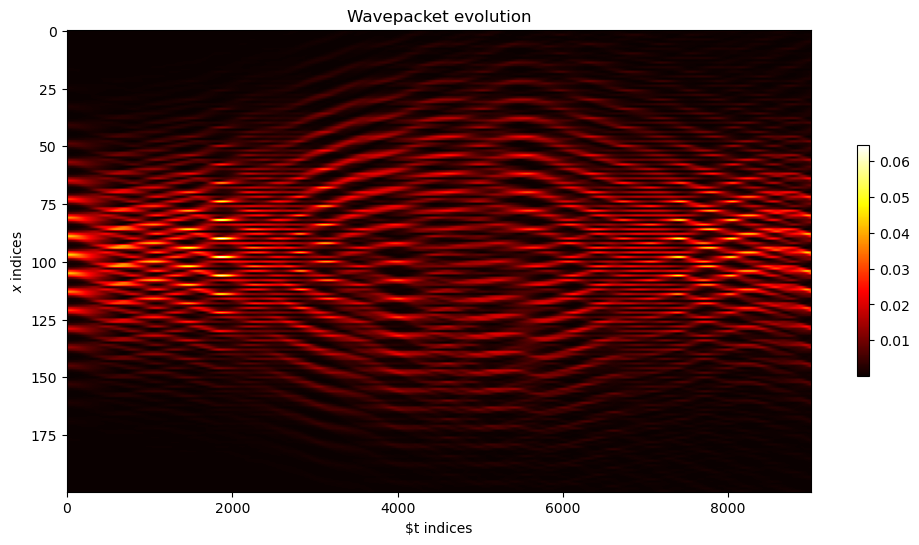

In [32]:
plt.figure(figsize = (12, 6))

im=plt.imshow(myfft_reshaped_rescaled.T[800:1000, 0:9001], cmap="hot",aspect="auto")
ax = plt.gca()
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="25%", pad=0.1)
#plt.colorbar(im, cax=cax)
plt.colorbar(shrink = 0.5)

plt.xlabel("$t indices")
plt.ylabel("$x$ indices")
plt.title("Wavepacket evolution")
print("Time when TOF starts:\t"+ str( 32*np.pi/11.5) )
y = np.arange(-96*2,96*2,0.1);

In [10]:
myfft_reshaped_rescaled.T.shape[]

(1794, 43540)